In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from mpdaf.sdetect import muselet, Catalog
from mpdaf.obj import Cube
from astropy.io import ascii
from mpdaf.sdetect import Source
from astropy.wcs import WCS
from astropy.io import fits

%matplotlib inline


In [38]:
# muselet('../data/MAGPI1202.fits')



# load catalogues and cubes

In [39]:
gal_name = 'MAGPI1206'

cube = Cube(f'../data/{gal_name}.fits')

In [3]:
LSD_cat_catalogue = ascii.read(f'/Users/wnanayakkara/Dropbox/MagPi/LSD_Cat_outputs_to_groups/{gal_name}_LSDCat.cat',  
                              names=['I' , 'ID' , 'X_PEAK_SN' , 'Y_PEAK_SN' , 'Z_PEAK_SN' , 'NPIX' , 'DETSN_MAX' ]).to_pandas()

LSD_cat_detections = pd.read_csv(f'../LSD_Cat_outputs_to_groups/LSDCAT_FLUX/{gal_name}_LSDCatFlux_detections_only.csv')




In [4]:
cat_lines = Catalog.read('../outputs/source_detection_tests_'+ gal_name.replace('MAGPI','')   +'/lines.fit').to_pandas().set_index('ID')

cat_objects = Catalog.read('../outputs/source_detection_tests_'+ gal_name.replace('MAGPI','') +'/objects.fit').to_pandas().set_index('ID')

In [5]:
wl = cube.sum(axis=0)


In [6]:
w = WCS(wl.get_wcs_header())


for index, LSD_det in LSD_cat_detections.T.iteritems():
    
#     print(LSD_det['X_PEAK_SN_lsdcat'], LSD_det['Y_PEAK_SN_lsdcat'], LSD_det['Z_PEAK_SN_lsdcat'])
    sky = w.pixel_to_world(LSD_det.X_PEAK_SN_lsdcat, LSD_det.Y_PEAK_SN_lsdcat)
    
    RA, DEC = sky.to_string(precision=8).split(' ')
    
    
    LSD_cat_detections.loc[index, 'RA_PEAK_SN_lsdcat']    = float(RA)
    LSD_cat_detections.loc[index, 'DEC_PEAK_SN_lsdcat'] = float(DEC)



for index, LSD_det in LSD_cat_catalogue.T.iteritems():
    
    sky = w.pixel_to_world(LSD_det.X_PEAK_SN, LSD_det.Y_PEAK_SN)
    
    RA, DEC = sky.to_string(precision=8).split(' ')
    
    
    LSD_cat_catalogue.loc[index, 'RA_PEAK_SN']    = float(RA)
    LSD_cat_catalogue.loc[index, 'DEC_PEAK_SN'] = float(DEC)
from astropy import units as u
from astropy.coordinates import SkyCoord

for index, muselet_det in cat_objects.T.iteritems():
    
    coord = SkyCoord(f'{muselet_det.RA}deg {muselet_det.DEC}deg', frame='fk5')

    x, y = w.world_to_pixel(coord)
    
    cat_objects.loc[index, 'x_det'] = x
    cat_objects.loc[index, 'y_det'] = y
    
#     break 


NameError: name 'ax' is not defined

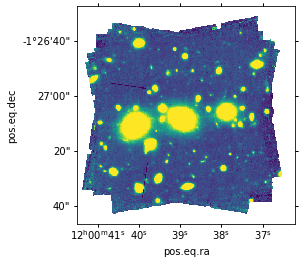

In [19]:
wl.plot(zscale=True, use_wcs=True)


ax.scatter(LSD_cat_catalogue['X_PEAK_SN'], LSD_cat_catalogue['Y_PEAK_SN'], 
            marker='o', edgecolor='k', facecolor='None', s=100,
           label='LSDCat ALL')

ax.scatter(LSD_cat_detections['X_PEAK_SN_lsdcat'], LSD_cat_detections['Y_PEAK_SN_lsdcat'], 
            marker='o', edgecolor='white', facecolor='None', s=100,
           label='LSDCat Detections')



ax.scatter(cat_objects['x_det'], cat_objects['y_det'], marker='.', color='red', 
           label='MUSELET', s=50, alpha=1.0)


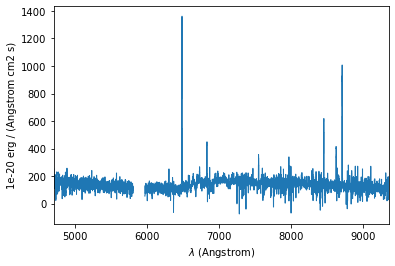

In [8]:
images = 10

5

In [31]:
#src_line = Source.from_file('../outputs/source_detection_tests/lines/lines-0001.fits')

for index, galaxy in cat_objects.T.iteritems():
    
    src_object = Source.from_file('../outputs/source_detection_tests_'+ gal_name.replace('MAGPI','') +'/objects/objects-'+str(index).zfill(4)+'.fits')
    
    
    src_object.add_white_image(cube)

    
    src_object.extract_spectra(cube, obj_mask='MASK_OBJ' , skysub=False)
    
    
    all_images = str(src_object.images.keys()).split(":")[-1].replace(')', '').strip().split(' ')

    rc=int((((len(all_images)*2)+2)**0.5))+1
    fig, ax = plt.subplots(figsize=(20,20), nrows=rc, ncols=rc)
    ax = ax.flatten()
    
    img_index=0
    for i , image in enumerate(all_images):
        
        src_object.images[image].plot(zscale=True, ax=ax[img_index], title=image)
           
        if ( image=='NB_COADD'): img_index+=1; continue
        if ( image=='MASK_OBJ'): img_index+=1; continue
        if ( image=='MUSE_WHITE'): img_index+=1; continue
        

            
        lc=int(image.replace('NB', ''))
        delta=20
        src_object.spectra['MUSE_TOT'].plot(ax=ax[img_index+1])  
        ax[img_index+1].set_xlim(lc-delta, lc+delta)

        img_index+=2
            
            
    wl.plot(zscale=True, use_wcs=False, ax=ax[img_index], title='White Light')
    ax[img_index].scatter(galaxy.x_det, galaxy.y_det, marker='o', facecolor='None', edgecolor='red')
    
    src_object.spectra['MUSE_TOT'].plot(ax=ax[img_index+1])
    
    
    
    plt.tight_layout()
    
    plt.savefig(f'../outputs/source_detection_tests_'+ gal_name.replace('MAGPI','')  +'/objects/figures_object'+str(index).zfill(4)+'.pdf')
    
    plt.close()
#     break 
    
    
    
    

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:352: RuntimeWarning: invalid value encountered in true_divide
  newdata = np.nansum(psf * data / var, axis=(1, 2)) / d
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:353: RuntimeWarning: divide by zero encountered in true_divide
  newvar = np.nansum(psf, axis=(1, 2)) / d
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:352: RuntimeWarning: invalid value encountered in true_divide
  newdata = np.nansum(psf * data / var, axis=(1, 2)) / d
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:353: RuntimeWarning: divide by zero encountered in true_divide
  newvar = np.nansum(psf, axis=(1, 2)) / d
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/wnanayakkara/opt/anaconda3/envs/astro

In [32]:
profound_line_sources = pd.read_csv('../data/MAGPI1206_profoundsources_el.csv')

profound_cont_sources = pd.read_csv('../data/MAGPI1206_profoundsources.csv')

In [33]:
profound_line_sources

,MAGPIID,segID,xcen,ycen,xmax,ymax,RAcen,Deccen,RAmax,Decmax,R50,R90,R100,con,semimaj,semimin,axrat,ang
0,1206090081,5043,90.765620,79.399997,90.5,81.5,180.167856,-1.458527,180.167871,-1.458411,0.732645,1.116198,2.004909,0.656375,4.399084,3.372083,0.766542,7.595281
1,1206149266,5073,150.568489,265.230697,149.5,266.5,180.164533,-1.448203,180.164592,-1.448133,0.453690,0.735107,1.134762,0.617176,2.204583,2.070859,0.939343,94.682566
2,1206250138,5074,250.935401,139.097368,250.5,138.5,180.158955,-1.455211,180.158979,-1.455244,0.453967,0.691780,1.260386,0.656230,2.296447,1.785383,0.777454,115.406963
3,1206120031,5092,120.313187,32.895604,120.5,31.5,180.166214,-1.461111,180.166204,-1.461188,0.608110,1.013987,1.205842,0.599721,3.225329,2.485340,0.770569,82.112089
4,1206102282,5101,103.155548,283.695399,102.5,282.5,180.167168,-1.447177,180.167204,-1.447244,0.769753,1.213156,2.420046,0.634504,5.040831,3.967103,0.786994,77.700682
5,1206248316,5131,248.292846,315.886085,248.5,316.5,180.159102,-1.445389,180.159091,-1.445355,0.465845,0.772569,1.524087,0.602981,3.087449,2.775455,0.898948,40.842698
6,1206333129,5141,334.132515,130.262620,333.5,129.5,180.154332,-1.455702,180.154367,-1.455744,0.511288,0.751926,1.181235,0.679971,2.340210,1.815144,0.775633,102.480945
7,1206054220,5190,54.316859,219.928083,54.5,220.5,180.169882,-1.450720,180.169872,-1.450688,0.460043,0.710296,1.445420,0.647678,2.948399,2.443694,0.828821,16.233930
8,1206222291,5191,222.594981,291.957851,222.5,291.5,180.160530,-1.446718,180.160536,-1.446744,0.443998,0.681724,1.068704,0.651287,2.080807,1.577378,0.758061,45.703524
9,1206148317,5198,148.062917,317.032779,148.5,317.5,180.164672,-1.445325,180.164648,-1.445299,0.454571,0.708190,1.602836,0.641877,3.031789,2.419116,0.797917,37.074583


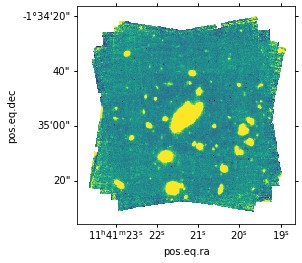

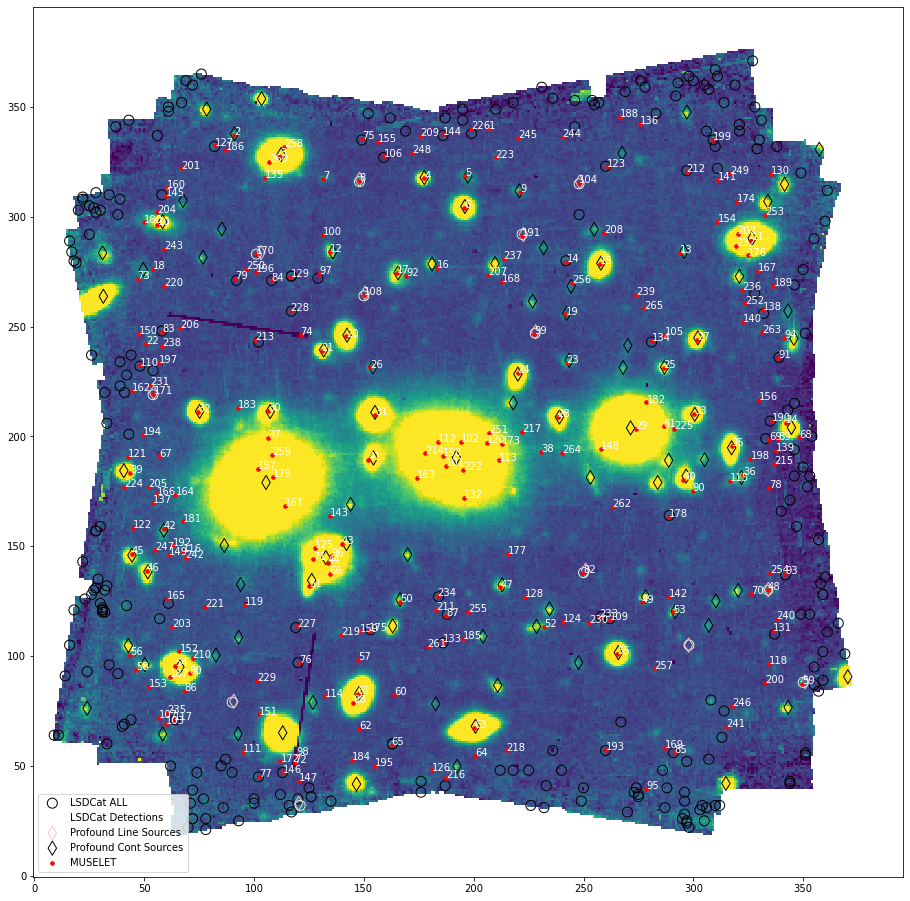

In [36]:
fig, ax = plt.subplots(figsize=(16,16))

wl.plot(zscale=True, use_wcs=False, ax=ax)


ax.scatter(LSD_cat_catalogue['X_PEAK_SN'], LSD_cat_catalogue['Y_PEAK_SN'], 
            marker='o', edgecolor='k', facecolor='None', s=100,
           label='LSDCat ALL')

ax.scatter(LSD_cat_detections['X_PEAK_SN_lsdcat'], LSD_cat_detections['Y_PEAK_SN_lsdcat'], 
            marker='o', edgecolor='white', facecolor='None', s=100,
           label='LSDCat Detections')

ax.scatter(profound_line_sources['xcen'], profound_line_sources['ycen'], 
            marker='d', edgecolor='pink', facecolor='None', s=100,
           label='Profound Line Sources')


ax.scatter(profound_cont_sources['xcen'], profound_cont_sources['ycen'], 
            marker='d', edgecolor='k', facecolor='None', s=100,
           label='Profound Cont Sources')


ax.scatter(cat_objects['x_det'], cat_objects['y_det'], marker='.', color='red', 
           label='MUSELET', s=50, alpha=1.0)

for index, gal in cat_objects.T.iteritems():
    
    
    ax.text(gal.x_det, gal.y_det, str(index) , color='white')
    



plt.legend()


plt.savefig(f'../outputs/magpi_{gal_name}_wl.pdf')

in 1206 how does the comparision look?

### Next to bright continuum sources

40-90
30--193 likely a noise pixel but unclear






8961: large halo

105: NEW
115-36, same object

In [34]:
profound_line_sources

,MAGPIID,segID,xcen,ycen,xmax,ymax,RAcen,Deccen,RAmax,Decmax,R50,R90,R100,con,semimaj,semimin,axrat,ang
0,1206090081,5043,90.765620,79.399997,90.5,81.5,180.167856,-1.458527,180.167871,-1.458411,0.732645,1.116198,2.004909,0.656375,4.399084,3.372083,0.766542,7.595281
1,1206149266,5073,150.568489,265.230697,149.5,266.5,180.164533,-1.448203,180.164592,-1.448133,0.453690,0.735107,1.134762,0.617176,2.204583,2.070859,0.939343,94.682566
2,1206250138,5074,250.935401,139.097368,250.5,138.5,180.158955,-1.455211,180.158979,-1.455244,0.453967,0.691780,1.260386,0.656230,2.296447,1.785383,0.777454,115.406963
3,1206120031,5092,120.313187,32.895604,120.5,31.5,180.166214,-1.461111,180.166204,-1.461188,0.608110,1.013987,1.205842,0.599721,3.225329,2.485340,0.770569,82.112089
4,1206102282,5101,103.155548,283.695399,102.5,282.5,180.167168,-1.447177,180.167204,-1.447244,0.769753,1.213156,2.420046,0.634504,5.040831,3.967103,0.786994,77.700682
5,1206248316,5131,248.292846,315.886085,248.5,316.5,180.159102,-1.445389,180.159091,-1.445355,0.465845,0.772569,1.524087,0.602981,3.087449,2.775455,0.898948,40.842698
6,1206333129,5141,334.132515,130.262620,333.5,129.5,180.154332,-1.455702,180.154367,-1.455744,0.511288,0.751926,1.181235,0.679971,2.340210,1.815144,0.775633,102.480945
7,1206054220,5190,54.316859,219.928083,54.5,220.5,180.169882,-1.450720,180.169872,-1.450688,0.460043,0.710296,1.445420,0.647678,2.948399,2.443694,0.828821,16.233930
8,1206222291,5191,222.594981,291.957851,222.5,291.5,180.160530,-1.446718,180.160536,-1.446744,0.443998,0.681724,1.068704,0.651287,2.080807,1.577378,0.758061,45.703524
9,1206148317,5198,148.062917,317.032779,148.5,317.5,180.164672,-1.445325,180.164648,-1.445299,0.454571,0.708190,1.602836,0.641877,3.031789,2.419116,0.797917,37.074583


In [211]:
LSD_cat_detections

,I,ID_lsdcat,X_PEAK_SN_lsdcat,Y_PEAK_SN_lsdcat,Z_PEAK_SN_lsdcat,NPIX_lsdcat,DETSN_MAX_lsdcat,agreed_grade,ID_lsdmeasure,X_PEAK_SN_lsdmeasure,...,F_KRON_ERR,F_2KRON,F_2KRON_ERR,F_3KRON,F_3KRON_ERR,F_4KRON,F_4KRON_ERR,RA_PEAK_SN_lsdcat,DEC_PEAK_SN_lsdcat,REDSHIFT_PEAK_SN_lsdcat
0,16,11,273,229,160,33,13.222964,1,11,273,...,28.259284,239.402409,58.157201,442.969398,90.162287,654.200516,121.651115,175.335,-1.58052,160.0
1,40,29,143,87,451,96,15.826314,1,29,143,...,28.958089,525.754585,57.162118,519.789200,85.844078,574.278641,113.313684,175.342,-1.58841,451.0
2,108,76,251,276,1132,8,11.095176,1,76,251,...,20.833049,46.713009,37.432745,-26.681142,55.580454,-48.766670,73.080664,175.336,-1.57791,1132.0
3,113,79,164,226,1190,78,16.889652,1,79,164,...,22.863340,286.718082,45.183721,444.714508,66.540856,652.482147,89.615746,175.341,-1.58068,1190.0
4,123,84,142,311,1275,60,16.073948,1,84,142,...,22.121923,296.611557,44.389620,359.423752,65.797410,380.167084,87.278128,175.342,-1.57596,1275.0
5,129,89,217,105,1362,230,28.534924,1,89,217,...,27.227714,734.302673,53.931012,727.597198,80.756140,778.359833,106.831598,175.338,-1.58741,1362.0
6,130,90,76,274,1370,14,11.660421,1,90,76,...,18.865350,27.653589,37.189639,13.655043,55.391741,64.560900,73.338685,175.345,-1.57802,1370.0
7,132,92,90,248,1384,387,27.088869,1,92,90,...,30.832639,1089.340210,58.883438,1147.514420,86.474829,1251.984253,113.024559,175.345,-1.57946,1384.0
8,144,104,163,277,1532,123,19.450001,1,104,163,...,22.600856,320.583382,43.328371,325.167236,63.753481,478.044968,85.257788,175.341,-1.57785,1532.0
9,150,109,130,325,1591,696,26.710571,1,109,130,...,33.313460,1779.309082,64.939513,2399.896851,97.309074,2641.435242,129.002342,175.342,-1.57519,1591.0


In [18]:
Catalog.read('../outputs/source_detection_tests_'+ gal_name.replace('MAGPI','')   +'/objects.fit')

ID,RA,DEC,FROM,FROM_V,CUBE,CUBE_V,SRC_V,FORMAT,MUSEB,MUSEB_ERR,MUSEG,MUSEG_ERR,MUSER,MUSER_ERR,Z_EMI,Z_EMI_MAX,Z_EMI_MIN,FLUX001,FLUX_ERR001,LBDA_OBS001,LBDA_OBS_ERR001,LINE001,FLUX002,FLUX_ERR002,LBDA_OBS002,LBDA_OBS_ERR002,LINE002,FLUX003,FLUX_ERR003,LBDA_OBS003,LBDA_OBS_ERR003,LINE003,FLUX004,FLUX_ERR004,LBDA_OBS004,LBDA_OBS_ERR004,LINE004,FLUX005,FLUX_ERR005,LBDA_OBS005,LBDA_OBS_ERR005,LINE005,FLUX006,FLUX_ERR006,LBDA_OBS006,LBDA_OBS_ERR006,LINE006,FLUX007,FLUX_ERR007,LBDA_OBS007,LBDA_OBS_ERR007,LINE007,FLUX008,FLUX_ERR008,LBDA_OBS008,LBDA_OBS_ERR008,LINE008,FLUX009,FLUX_ERR009,LBDA_OBS009,LBDA_OBS_ERR009,LINE009,FLUX010,FLUX_ERR010,LBDA_OBS010,LBDA_OBS_ERR010,LINE010,FLUX011,FLUX_ERR011,LBDA_OBS011,LBDA_OBS_ERR011,LINE011,FLUX012,FLUX_ERR012,LBDA_OBS012,LBDA_OBS_ERR012,LINE012,FLUX013,FLUX_ERR013,LBDA_OBS013,LBDA_OBS_ERR013,LINE013,FLUX014,FLUX_ERR014,LBDA_OBS014,LBDA_OBS_ERR014,LINE014,FLUX015,FLUX_ERR015,LBDA_OBS015,LBDA_OBS_ERR015,LINE015,FLUX016,FLUX_ERR016,LBDA_OBS016,LBDA_OBS_ERR016,LINE016,FLUX017,FLUX_ERR017,LBDA_OBS017,LBDA_OBS_ERR017,LINE017,FLUX018,FLUX_ERR018,LBDA_OBS018,LBDA_OBS_ERR018,LINE018,FLUX019,FLUX_ERR019,LBDA_OBS019,LBDA_OBS_ERR019,LINE019,FLUX020,FLUX_ERR020,LBDA_OBS020,LBDA_OBS_ERR020,LINE020,FLUX021,FLUX_ERR021,LBDA_OBS021,LBDA_OBS_ERR021,LINE021,FLUX022,FLUX_ERR022,LBDA_OBS022,LBDA_OBS_ERR022,LINE022,FLUX023,FLUX_ERR023,LBDA_OBS023,LBDA_OBS_ERR023,LINE023,FLUX024,FLUX_ERR024,LBDA_OBS024,LBDA_OBS_ERR024,LINE024,FLUX025,FLUX_ERR025,LBDA_OBS025,LBDA_OBS_ERR025,LINE025,FILENAME
,deg,deg,,,,,,,mag,mag,mag,mag,mag,mag,,,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,1e-20 erg / (Angstrom cm2 s),1e-20 erg / (Angstrom cm2 s),Angstrom,Angstrom,,
int64,float64,float64,bytes7,bytes3,bytes9,bytes1,bytes1,bytes3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,bytes20,float6